# **Project Name**    - Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Group
##### **Presented by**    - Mainudin Chhimpa , Zohaib Sheikh

# **Business Context**

The introduction of rental bikes in urban cities has significantly improved mobility comfort, offering a convenient mode of transportation for the public. To ensure the success of this service, it is crucial to make rental bikes available and accessible to the public at the right time, reducing waiting times and enhancing the overall user experience. However, one of the main challenges in managing a bike rental system is the prediction of the number of bikes required at each hour to maintain a stable supply of rental bikes. This project aims to address this challenge by utilizing a dataset that includes various weather-related parameters (such as temperature, humidity, windspeed, visibility, dewpoint, solar radiation, snowfall, and rainfall), as well as data on the number of bikes rented per hour and date information.

# **Problem Statement**


The main problem seeks to solve is the accurate prediction of the number of bikes required at each hour to ensure a stable supply of rental bikes in urban areas. This prediction is essential for minimizing waiting times for users and optimizing the allocation of bikes to different locations.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

### Dataset Loading

In [ ]:
bike_share = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML Project/Bike Sharing Demand Prediction/SeoulBikeData.csv",encoding='latin-1',parse_dates=["Date"])

### Dataset First View

In [ ]:
# Dataset First
bike_share.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns
print(f"Number of rows : {bike_share.shape[0]}\nNumber of Columns : {bike_share.shape[1]}")

Number of rows : 8760
Number of Columns : 14


### Dataset Information

In [ ]:
# Dataset Info
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(bike_share[bike_share.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(bike_share.isnull().sum())

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


### What did you know about your dataset?

The given Dataset is a dataste of Bike sharing demand dataset,we have to analysis the Number of Rented Bikes per hour on the daily basis and the insights behind it.

The above dataset has 8760 rows and 14 columns. There are no mising values and duplicate values in the dataset.

## ***2. Understanding Your Variables***

In [ ]:
bike_share.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
bike_share.describe(include='object')

,Seasons,Holiday,Functioning Day
count,8760,8760,8760
unique,4,2,2
top,Spring,No Holiday,Yes
freq,2208,8328,8465


### Variables Description

- **Date** : year-month-day
-**Rented Bike count** - Count of bikes rented at each hour
-**Hour** - Hour of the day
- **Temperature**-Temperature in Celsius
- **Humidity** - %
- **Windspeed** - m/s
- **Visibility** - 10m
- **Dew point temperature** - Celsius
-**Solar radiation**- MJ/m2
-**Rainfall** - mm
-**Snowfall** - cm
- **Seasons** - Winter, Spring, Summer, Autumn
- **Holiday** - Holiday/No holiday
- **Functional Day** - NoFunc(Non Functional Hours), Fun(Functional hours)

### Check Unique Values for each variable.

In [ ]:
# understand the variables
variables = pd.DataFrame(columns=['variable','Number of unique values','values'])
for i,var in enumerate(bike_share.columns):
    variables.loc[i] = [var,bike_share[var].nunique(),bike_share[var].unique().tolist()]
variables.set_index('variable')

,Number of unique values,values
variable,,
Date,365,"[1484179200000000000, 1486857600000000000, 148..."
Rented Bike Count,2166,"[254, 204, 173, 107, 78, 100, 181, 460, 930, 4..."
Hour,24,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
Temperature(°C),546,"[-5.2, -5.5, -6.0, -6.2, -6.4, -6.6, -7.4, -7...."
Humidity(%),90,"[37, 38, 39, 40, 36, 35, 27, 24, 21, 23, 25, 2..."
Wind speed (m/s),65,"[2.2, 0.8, 1.0, 0.9, 2.3, 1.5, 1.3, 1.1, 0.5, ..."
Visibility (10m),1789,"[2000, 1928, 1996, 1936, 793, 1913, 1687, 1380..."
Dew point temperature(°C),556,"[-17.6, -17.7, -18.6, -18.7, -19.5, -19.3, -19..."
Solar Radiation (MJ/m2),345,"[0.0, 0.01, 0.23, 0.65, 0.94, 1.11, 1.16, 1.01..."


## 3. ***Data Wrangling***

### Data Wrangling Code

In This Dataset 12th day of every month is inconsistent that means ,I have to replace dates from 2017-01-12 to 2017-11-12 into 2018-01-12 to 2018-11-12.

In [ ]:
# Define a function to modify the date
def update_date(date):
    if date <= pd.to_datetime('2017-11-12'):
        return date.replace(year=date.year + 1)
    else:
        return date

In [ ]:
# Apply the function to the 'date' column
bike_share['Date'] = bike_share['Date'].apply(update_date)
bike_share = bike_share.reset_index(drop=True)

In [ ]:
daily_rentals = bike_share.groupby('Date',as_index=False)['Rented Bike Count'].sum()
daily_rentals.head()

,Date,Rented Bike Count
0,2017-12-12,5496
1,2017-12-13,6019
2,2017-12-14,6398
3,2017-12-15,7198
4,2017-12-16,4632


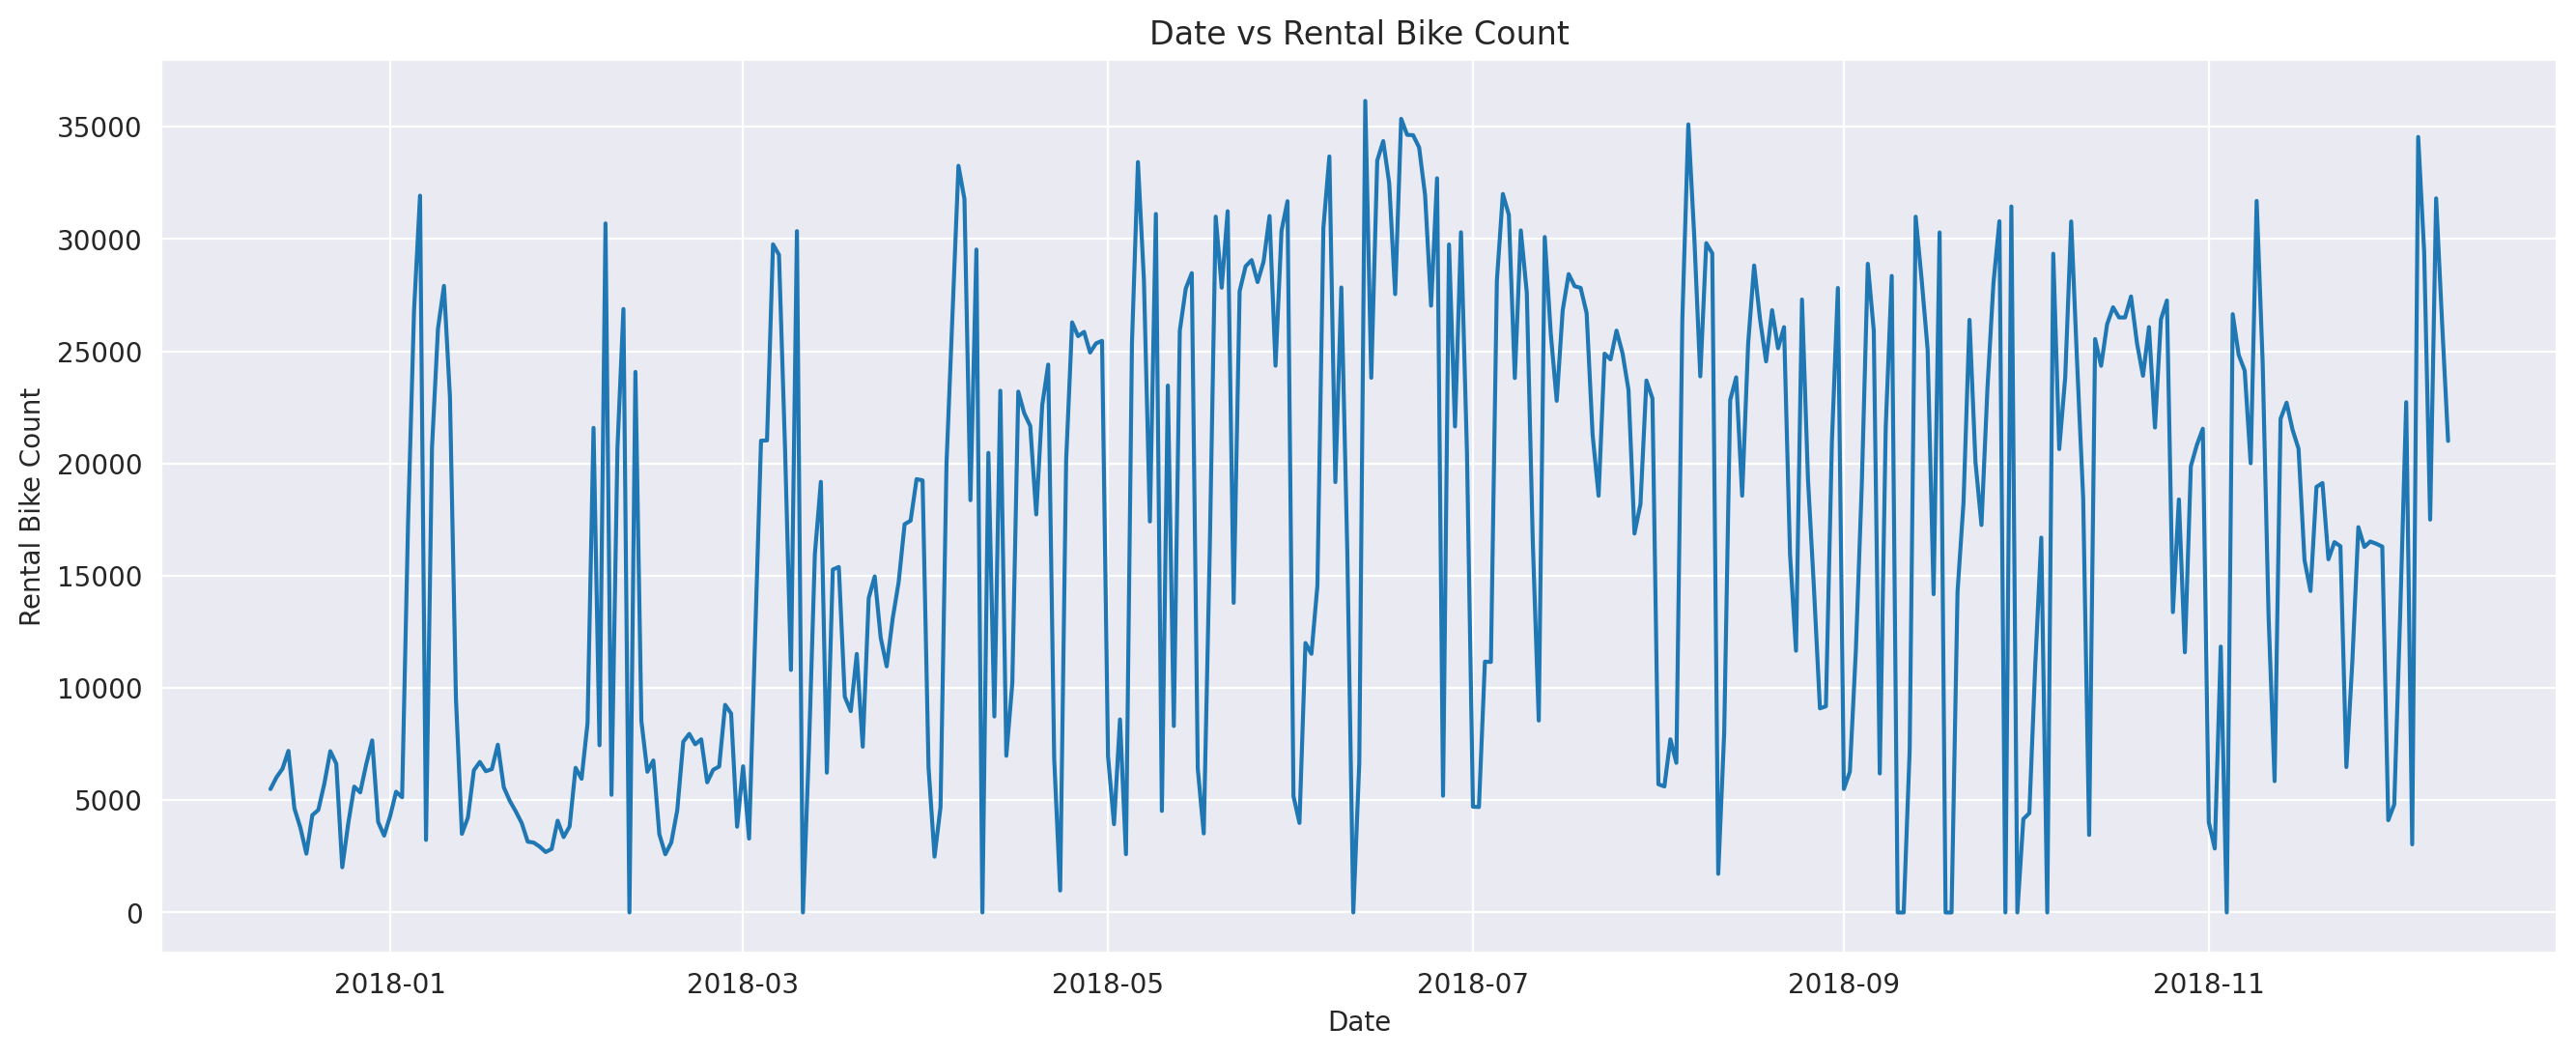

In [ ]:
plt.figure(figsize=(16, 6))
# daily_rentals.plot('Date','Rented Bike Count')
plt.plot(daily_rentals['Date'],daily_rentals['Rented Bike Count'])
plt.xlabel("Date")
plt.ylabel("Rental Bike Count")
plt.title("Date vs Rental Bike Count")
plt.show()

In [ ]:
daily_rentals['day_of_week'] = daily_rentals['Date'].dt.day_name()
daily_rentals.head()

,Date,Rented Bike Count,day_of_week
0,2017-12-12,5496,Tuesday
1,2017-12-13,6019,Wednesday
2,2017-12-14,6398,Thursday
3,2017-12-15,7198,Friday
4,2017-12-16,4632,Saturday


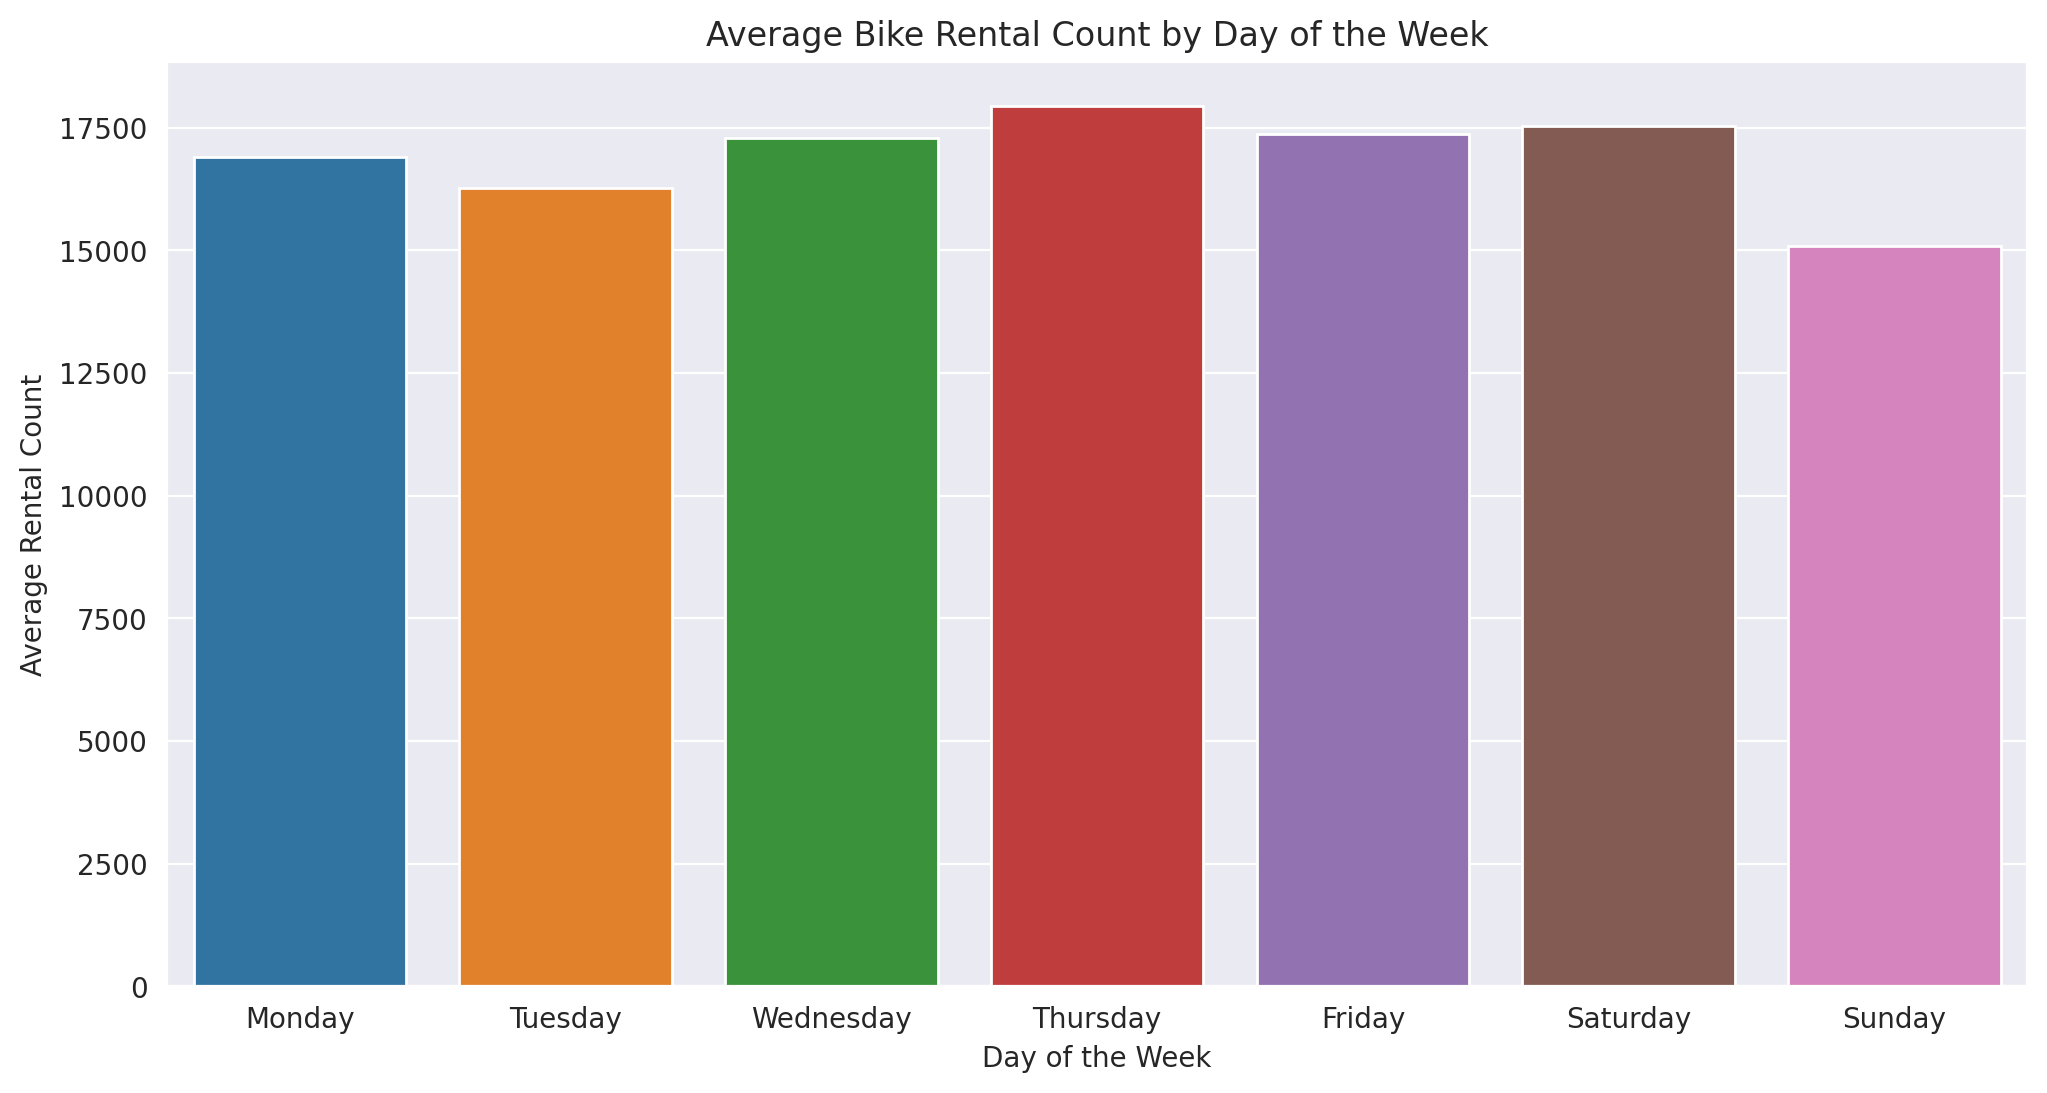

In [ ]:
plt.figure(figsize=(12, 6))
weekly_rentals = daily_rentals.groupby('day_of_week')['Rented Bike Count'].mean()
weekly_rentals = weekly_rentals.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
sns.barplot(x=weekly_rentals.index, y=weekly_rentals.values)
plt.title("Average Bike Rental Count by Day of the Week")
plt.ylabel("Average Rental Count")
plt.xlabel("Day of the Week")
plt.show()

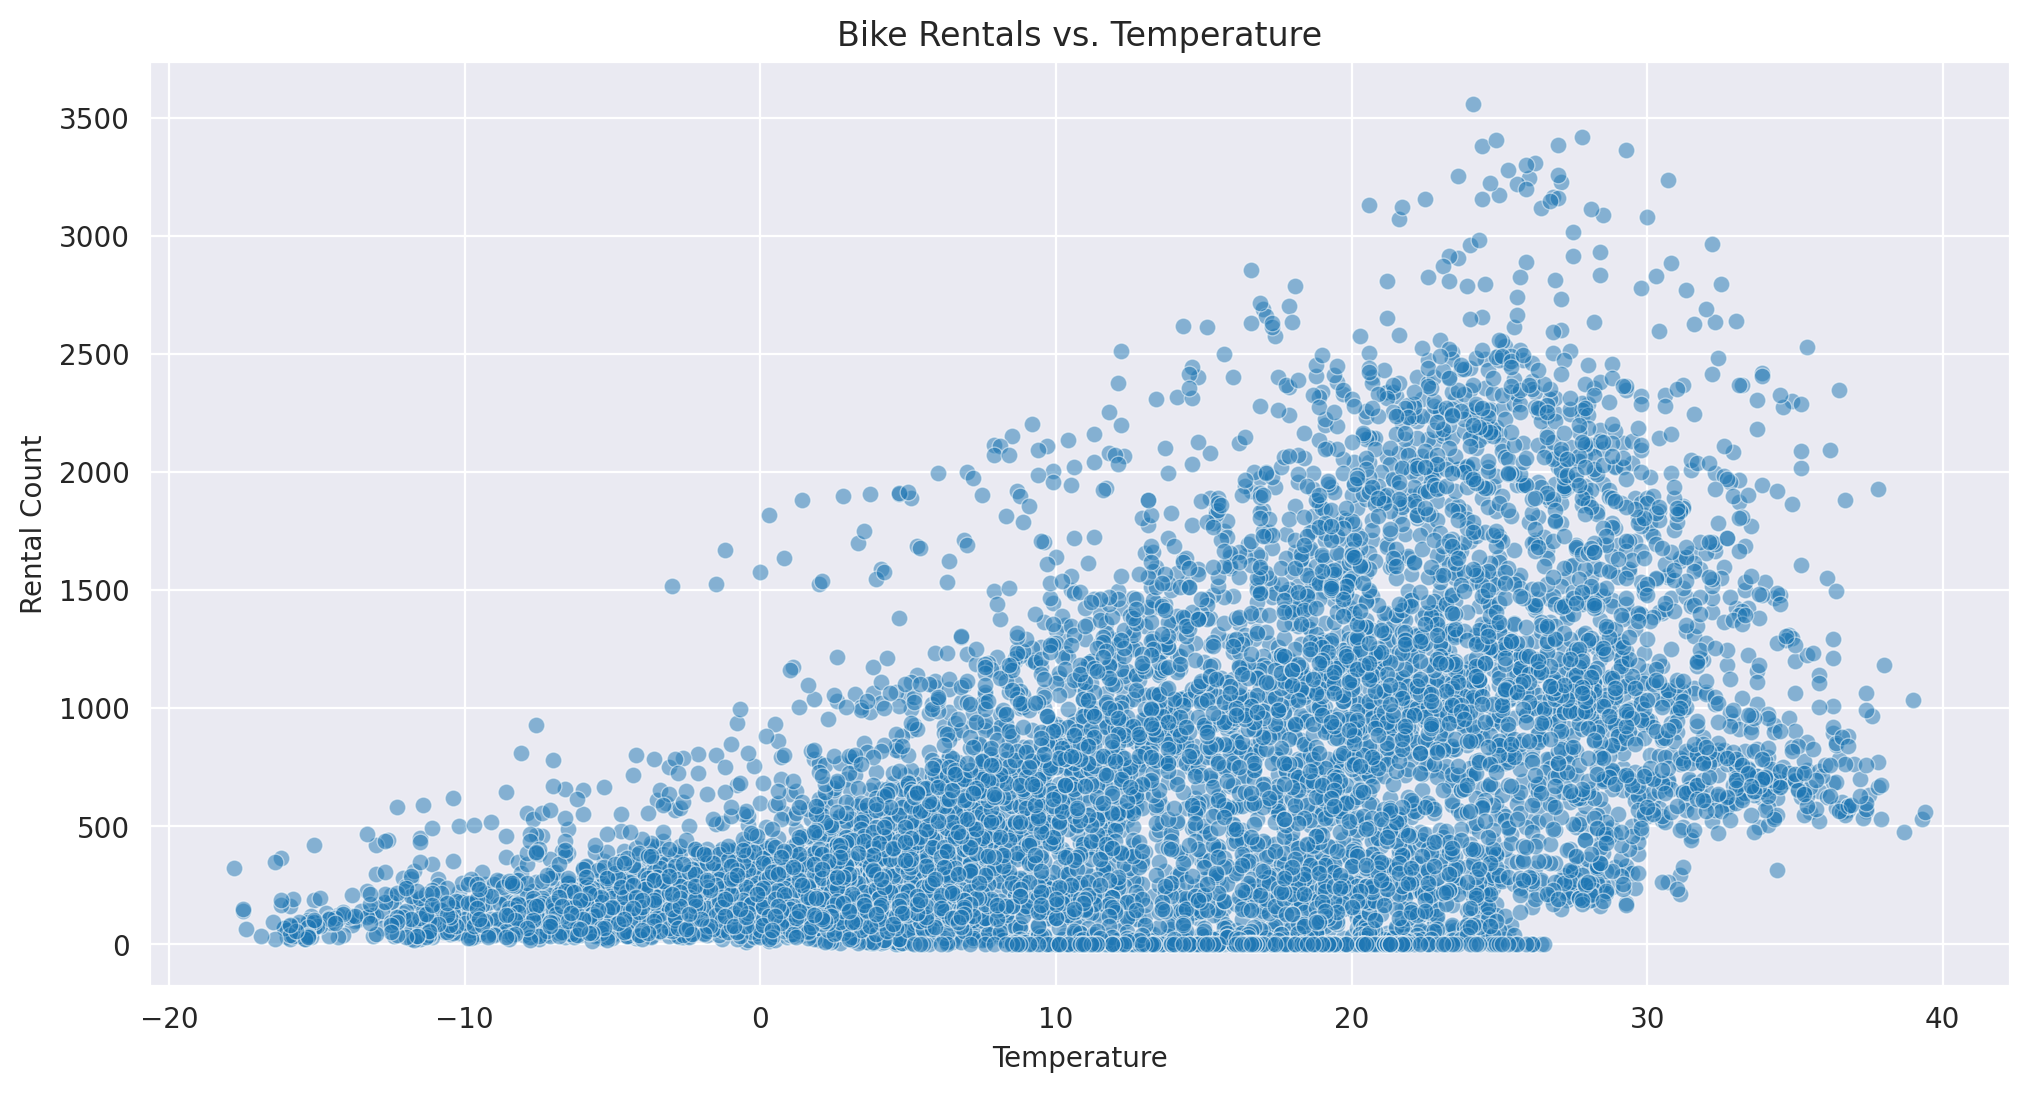

In [ ]:
# Weather Impact
# Question: How does weather, such as temperature, humidity, and wind speed, correlate with bike rentals?
plt.figure(figsize=(12, 6))
sns.scatterplot(data=bike_share, x='Temperature(°C)', y='Rented Bike Count', alpha=0.5)
plt.title("Bike Rentals vs. Temperature")
plt.xlabel("Temperature")
plt.ylabel("Rental Count")
plt.show()

In This Scatter plot we can clearly see that when tempreature increase rental count also increase . specially when temprature 15 degree to 30 degree there highest number of bike rental count.

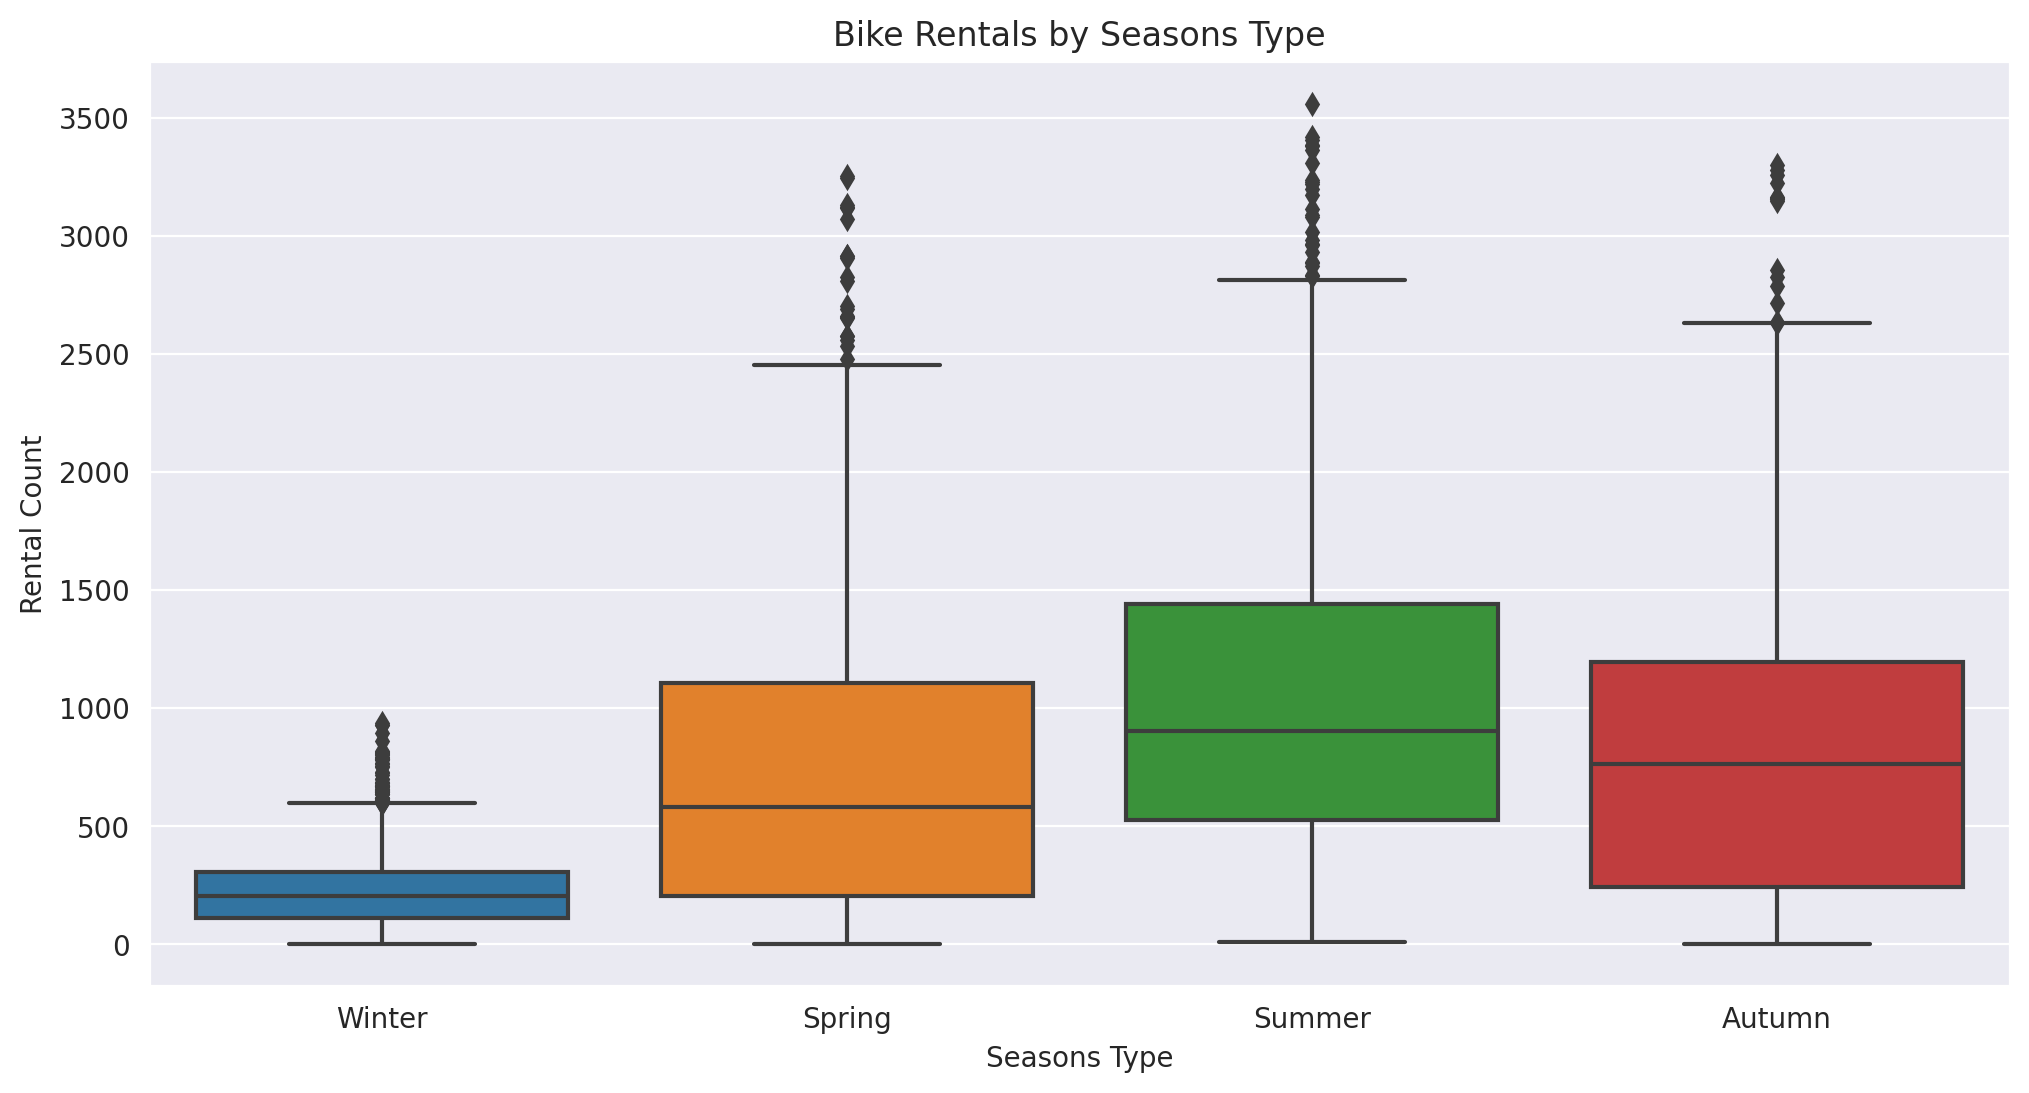

In [ ]:
# Question: Are there different seasons segments with distinct rental patterns?
plt.figure(figsize=(12, 6))
sns.boxplot(data=bike_share, x='Seasons', y='Rented Bike Count')
plt.title("Bike Rentals by Seasons Type")
plt.xlabel("Seasons Type")
plt.ylabel("Rental Count")
plt.show()

In this distribution of rentenal count by session type, I can clearly see that in summer season there is high demand of bikes.

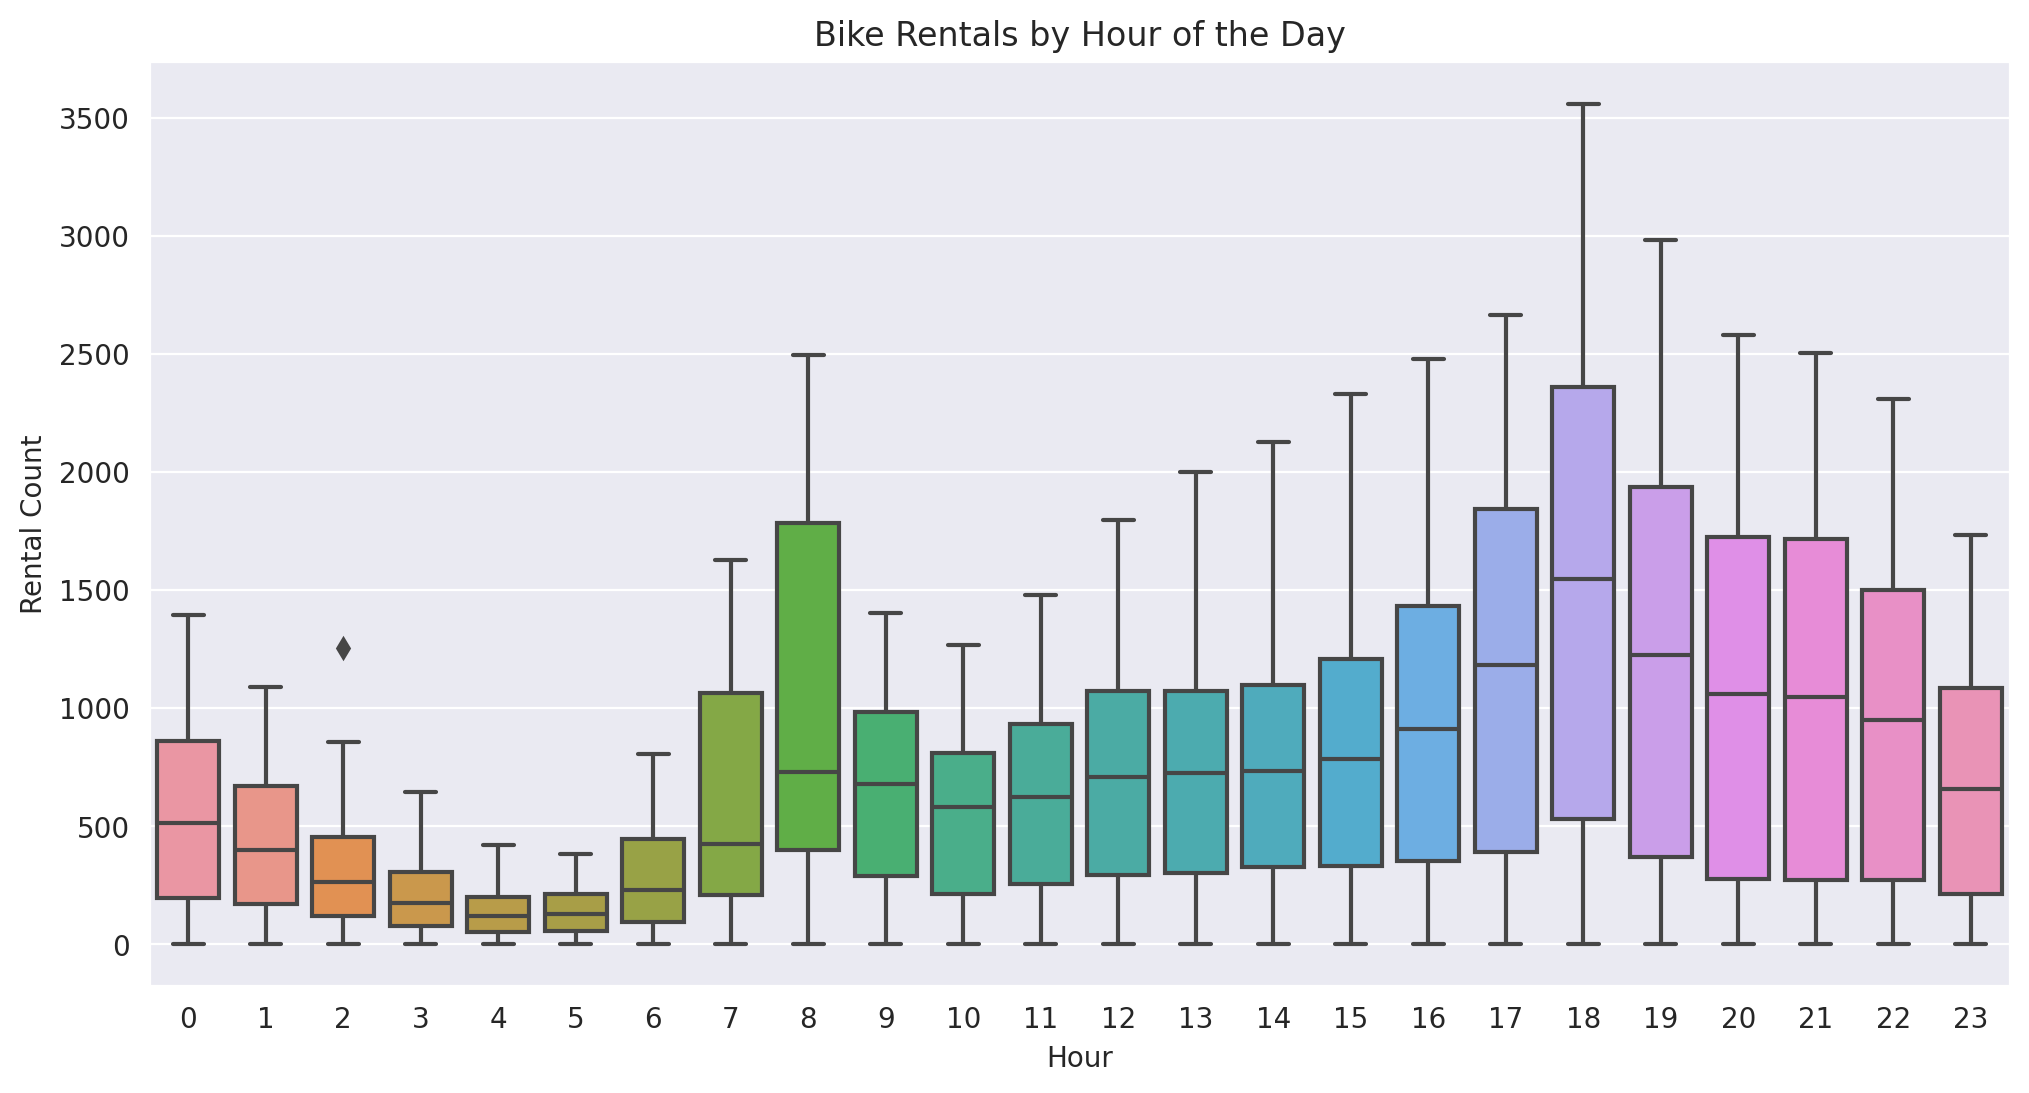

In [ ]:
# Box plot for rental counts by hour of the day
plt.figure(figsize=(12, 6))
sns.boxplot(data=bike_share, x='Hour', y='Rented Bike Count')
plt.title("Bike Rentals by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Rental Count")
plt.show()

In this hourly distribution of rental count there are some insights like 8AM and 6PM are the peak hour for rental bike.

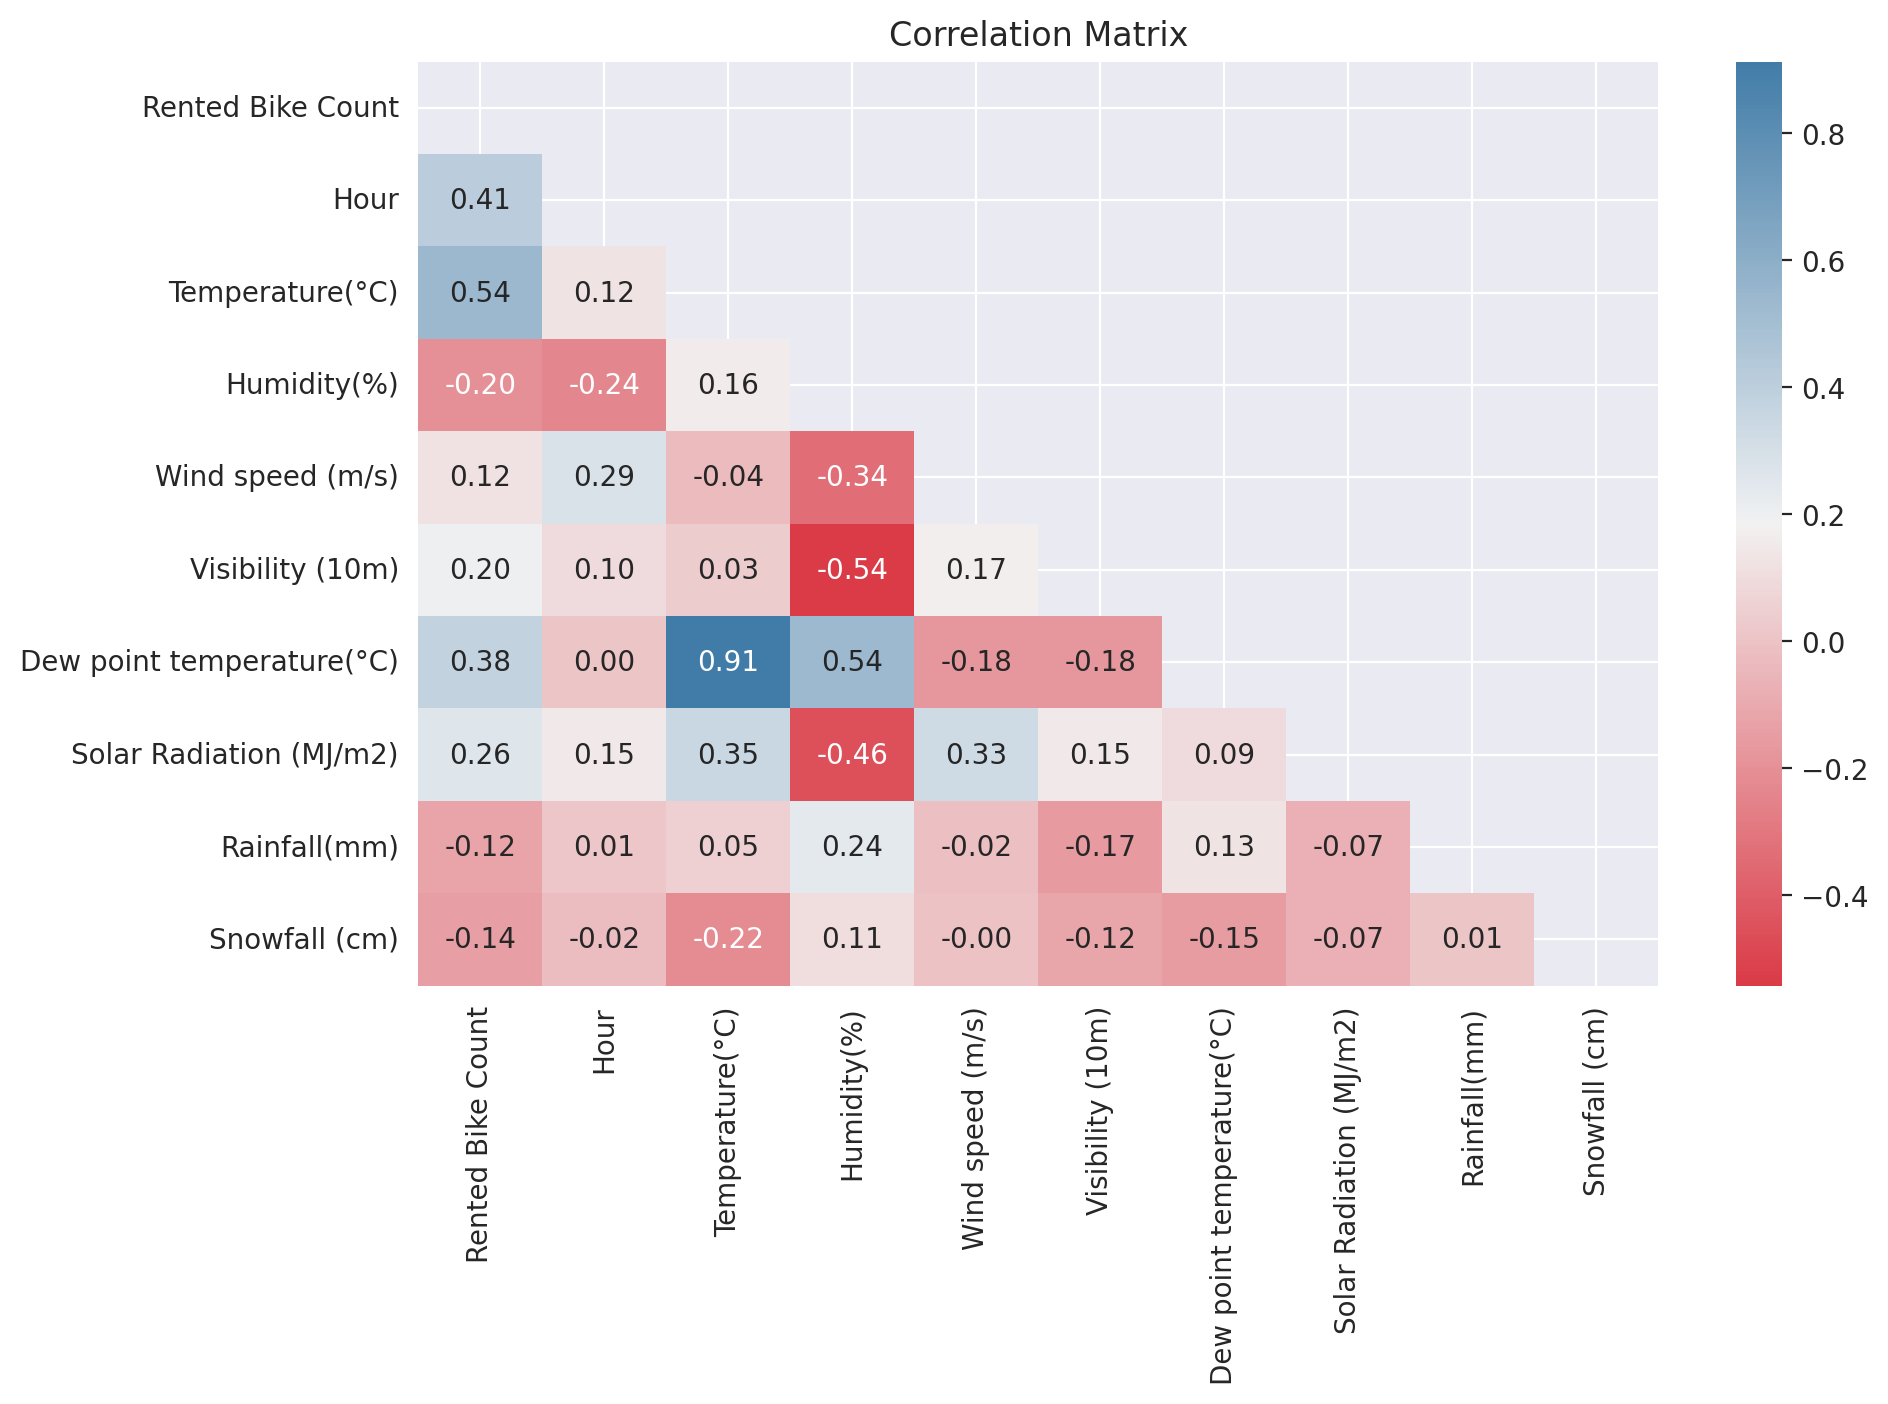

In [ ]:
# Correlation heatmap
correlation_matrix = bike_share.corr()
cmap = sns.diverging_palette(h_neg=10,h_pos=240,as_cmap=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap,mask=mask,fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

- Temperature and Dew point Temperature is strongly postive correlated, so one of thecolumn should be eliminated to reduce curse of dimensionality

In [ ]:
#Dew Point Temperature is highly correlated .let's delete this variable
del bike_share['Dew point temperature(°C)']

### Feature Selection

#### Feature selection methods are intended to reduce the number of input variables to those that are believed to be most useful to a model in order to predict the target variable..

In [ ]:
bike_share=pd.get_dummies(bike_share,columns=['Holiday','Seasons','Functioning Day','Hour'],drop_first=True)

In [ ]:
X=bike_share.iloc[:,2:].values # feature variable
y=bike_share['Rented Bike Count'].values # target variable

In [ ]:
fs = SelectKBest(score_func=f_regression, k='all')
fs.fit(X, y)

SelectKBest(k='all', score_func=<function f_regression at 0x7b2c0d82a8c0>)

In [ ]:
feature_contribution=list((fs.scores_/sum(fs.scores_))*100)
feature_contribution

[31.57588707752419,
 3.2130316061816133,
 1.1505015472761022,
 3.1963089581046975,
 5.6888920680518105,
 1.1887273831531893,
 1.586054011430595,
 0.40656271474782174,
 0.04051098373936182,
 7.45233751682526,
 17.03058346707124,
 3.354188962354017,
 0.6313296549869545,
 1.3344768024330684,
 2.084634053942908,
 2.7368246645418983,
 2.6729336323064996,
 1.4310175871867286,
 0.07861259502004538,
 0.7898429070345038,
 0.027768490570729686,
 0.25328811529532025,
 0.0870546689462964,
 0.00021517359649570578,
 0.006628989482631314,
 0.023758617687199217,
 0.12559095352708882,
 0.4149017841732098,
 1.5515043080248845,
 5.515995761613491,
 1.9941101892010669,
 1.087583212842033,
 0.8727568182787736,
 0.386530614863374,
 0.009054107984875968]

In [ ]:
for i,j in enumerate(bike_share.iloc[:,2:].columns):
    print(f'{j} : {feature_contribution[i]:.2f}%')

Temperature(°C) : 31.58%
Humidity(%) : 3.21%
Wind speed (m/s) : 1.15%
Visibility (10m) : 3.20%
Solar Radiation (MJ/m2) : 5.69%
Rainfall(mm) : 1.19%
Snowfall (cm) : 1.59%
Holiday_No Holiday : 0.41%
Seasons_Spring : 0.04%
Seasons_Summer : 7.45%
Seasons_Winter : 17.03%
Functioning Day_Yes : 3.35%
Hour_1 : 0.63%
Hour_2 : 1.33%
Hour_3 : 2.08%
Hour_4 : 2.74%
Hour_5 : 2.67%
Hour_6 : 1.43%
Hour_7 : 0.08%
Hour_8 : 0.79%
Hour_9 : 0.03%
Hour_10 : 0.25%
Hour_11 : 0.09%
Hour_12 : 0.00%
Hour_13 : 0.01%
Hour_14 : 0.02%
Hour_15 : 0.13%
Hour_16 : 0.41%
Hour_17 : 1.55%
Hour_18 : 5.52%
Hour_19 : 1.99%
Hour_20 : 1.09%
Hour_21 : 0.87%
Hour_22 : 0.39%
Hour_23 : 0.01%


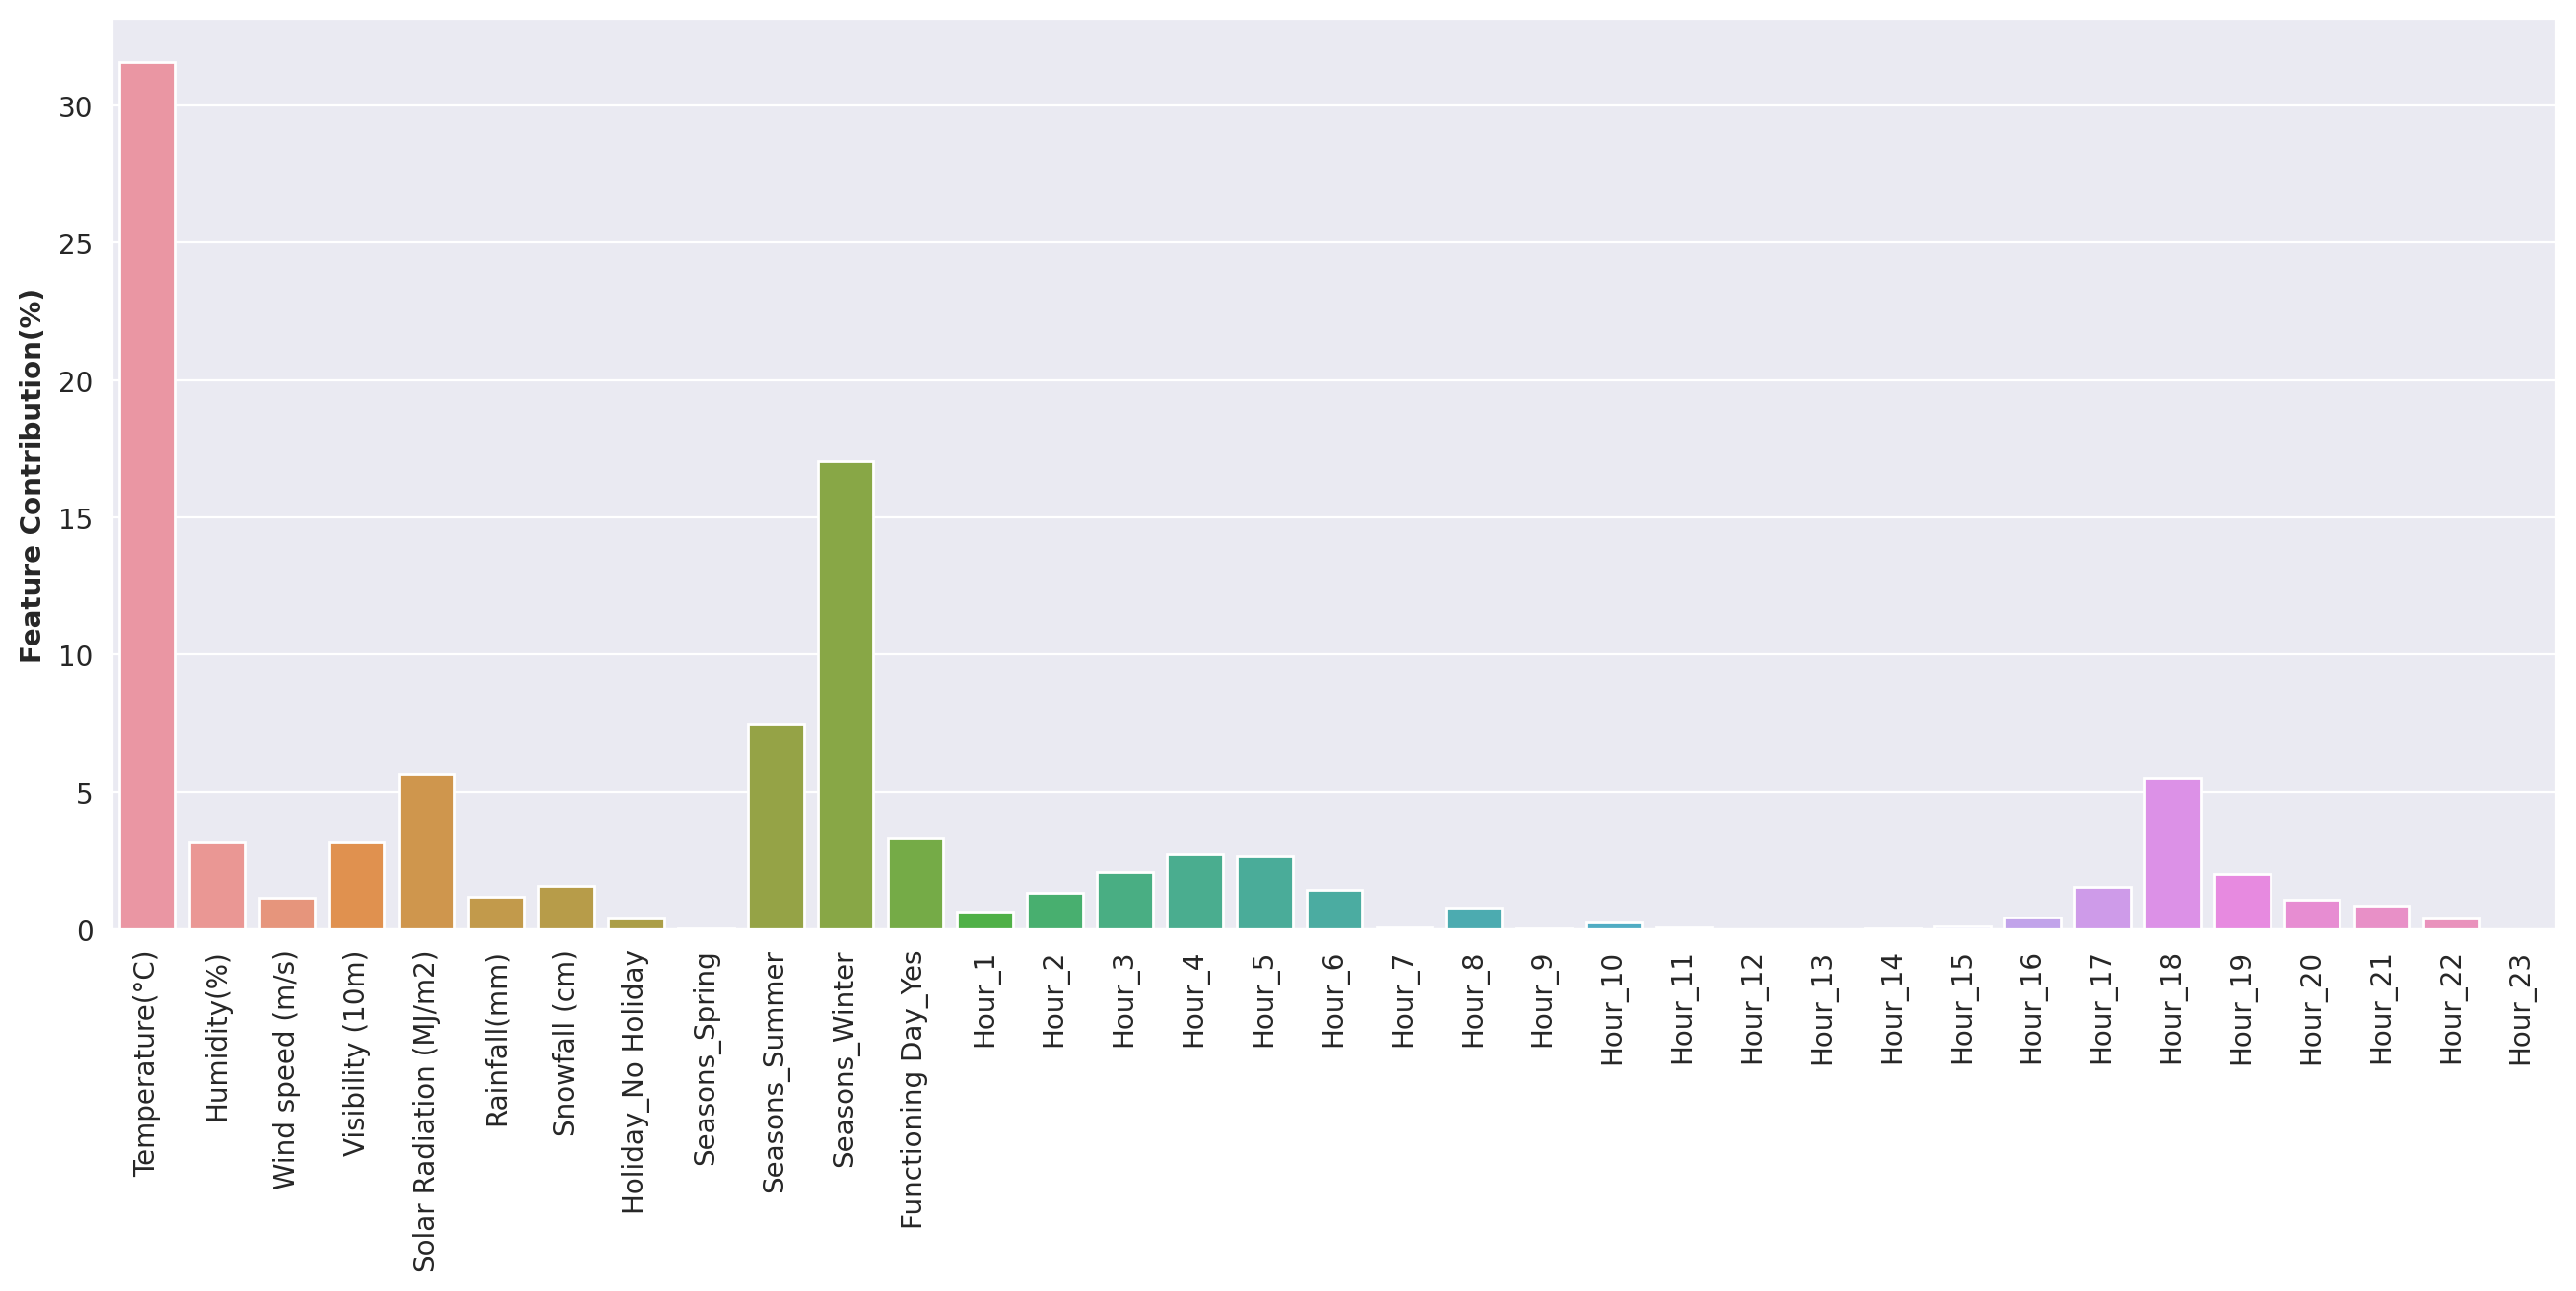

In [ ]:
plt.figure(figsize=(16,6))
sns.barplot(x=bike_share.iloc[:,2:].columns,y=feature_contribution)
plt.xticks(rotation=90)
plt.ylabel('Feature Contribution(%)',weight='semibold')
plt.show()

**From the above bar garph we can see the feature importance and we will include only those features which are more important for our model.**

In [ ]:
# Select only those feature which has importance greater than 1%.
feature_important_index = [index for index,value in enumerate(feature_contribution) if value>1]
feature_important_index

[0, 1, 2, 3, 4, 5, 6, 9, 10, 11, 13, 14, 15, 16, 17, 28, 29, 30, 31]

In [ ]:
X = X[:,feature_important_index]
y = y

### Splitting our dataset into train and test set

In [ ]:
from sklearn.model_selection import train_test_split

#splitting our dataset in 80% training and 20% testset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### Apply ML Model

In [ ]:
#importing different Regression models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.model_selection import cross_val_score

In [ ]:
#creating dictionary for storing different models accuracy
model_comparison={}

### **Linear Regression**

In [ ]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred_train = lr.predict(X_train)
y_pred_test=lr.predict(X_test)
print(f"Model Training R-Square : {r2_score(y_train,y_pred_train)*100:.2f}%")
print(f"Model Testing R-Square : {r2_score(y_test,y_pred_test)*100:.2f}%")
print(f"Model Testing MSE : {mean_squared_error(y_test,y_pred_test)*100:.2f}")
accuracies = cross_val_score(estimator = lr, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} ".format(accuracies.std()*100))
model_comparison['Linear Regression']=[r2_score(y_test,y_pred_test),mean_squared_error(y_test,y_pred_test),(accuracies.mean()),(accuracies.std())]

Model Training R-Square : 60.52%
Model Testing R-Square : 59.24%
Model Testing MSE : 16983740.68
Cross Val Accuracy: 60.15 %
Cross Val Standard Deviation: 1.48 


### **Polynomial Regression**

In [ ]:
poly_reg=PolynomialFeatures(degree=2)
model=LinearRegression()
model.fit(poly_reg.fit_transform(X_train),y_train)
y_pred_test=model.predict(poly_reg.fit_transform(X_test))
y_pred_train = model.predict(poly_reg.fit_transform(X_train))
print(f"Model training R-Square : {r2_score(y_train,y_pred_train)*100:.2f}%")
print(f"Model testing R-Square : {r2_score(y_test,y_pred_test)*100:.2f}%")
print(f"Model testing MSE : {mean_squared_error(y_test,y_pred_test)*100:.2f}")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} ".format(accuracies.std()*100))
model_comparison['Polynomial Regression']=[r2_score(y_test,y_pred_test),mean_squared_error(y_test,y_pred_test),(accuracies.mean()),(accuracies.std())]

Model training R-Square : 76.39%
Model testing R-Square : 72.99%
Model testing MSE : 11252598.12
Cross Val Accuracy: 60.15 %
Cross Val Standard Deviation: 1.48 


### **Decision Tree Regression**

In [ ]:
model=DecisionTreeRegressor()
model.fit(X_train,y_train)
y_pred_test=model.predict(X_test)
y_pred_train = model.predict(X_train)
print(f"Model Training R-Square : {r2_score(y_train,y_pred_train)*100:.2f}%")
print(f"Model Testing R-Square : {r2_score(y_test,y_pred_test)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred_test)*100:.2f}")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f}".format(accuracies.std()*100))
model_comparison['Decision Tree Regression']=[r2_score(y_test,y_pred_test),mean_squared_error(y_test,y_pred_test),(accuracies.mean()),(accuracies.std())]

Model Training R-Square : 100.00%
Model Testing R-Square : 67.75%
Model MSE : 13435875.68
Cross Val Accuracy: 62.80 %
Cross Val Standard Deviation: 1.72


### **Random Forest Regression**

In [ ]:
model=RandomForestRegressor(n_estimators=10,random_state=0)
model.fit(X_train,y_train)
y_pred_test=model.predict(X_test)
y_pred_train  = model.predict(X_train)
print(f"Model Training R-Square : {r2_score(y_train,y_pred_train)*100:.2f}%")
print(f"Model Testing R-Square : {r2_score(y_test,y_pred_test)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred_test)*100:.2f}")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} ".format(accuracies.std()*100))
model_comparison['Random forest Regression']=[r2_score(y_test,y_pred_test),mean_squared_error(y_test,y_pred_test),(accuracies.mean()),(accuracies.std())]

Model Training R-Square : 96.28%
Model Testing R-Square : 78.43%
Model MSE : 8986217.07
Cross Val Accuracy: 78.47 %
Cross Val Standard Deviation: 1.89 


**From Above four model Random Forest is the Best model where mean_squred_error is minimum and model R2-score is also great.**